In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import TimeSeriesSplit

In [ ]:
import tensorflow as tf
tf.__version__

!pip3 install keras
from tensorflow.python.keras.engine.sequential import Sequential
from tensorflow.python.keras.layers import * #LSTM,GRU, Dense, Bidirectional, SimpleRNN, Dense, TimeDistributed, Flatten, Dropout
from tensorflow.python.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [ ]:
df = pd.read_csv('/content/mucnuoc_gio.csv')

In [ ]:
df.columns=['datetime','q55','q64','q66','q69','q120']

In [ ]:
df['datetime']=pd.to_datetime(df['datetime'], format='%Y-%m-%d %H:%M') # The format was incorrect. There is a '/' between year and month and month and day

In [ ]:
df= df.set_index('datetime')
df.shape
print(df.head())

                      q55   q64   q66   q69  q120
datetime                                         
2014-01-01 01:00:00 -8.00 -4.58 -1.45 -9.01 -0.94
2014-01-01 03:00:00 -7.98 -4.57 -1.45 -9.00 -0.94
2014-01-01 05:00:00 -7.95 -4.58 -1.45 -9.00 -0.94
2014-01-01 07:00:00 -7.92 -4.59 -1.45 -9.01 -0.94
2014-01-01 09:00:00 -7.98 -4.59 -1.46 -9.00 -0.94


In [ ]:
nul_data_q120 = pd.isnull(df['q120'])
nul_data_q55 = pd.isnull(df['q55'])
nul_data_q64 = pd.isnull(df['q64'])
nul_data_q66 = pd.isnull(df['q66'])
nul_data_q69 = pd.isnull(df['q69'])
df[nul_data_q55]

,q55,q64,q66,q69,q120
datetime,,,,,
2014-01-02 17:00:00,NaN,-4.56,-1.46,-8.94,-0.92
2014-01-31 15:00:00,NaN,NaN,NaN,NaN,-1.06
2014-01-31 17:00:00,NaN,NaN,NaN,NaN,-1.06
2014-01-31 19:00:00,NaN,NaN,NaN,NaN,-1.06
2014-01-31 21:00:00,NaN,NaN,NaN,NaN,-1.06
...,...,...,...,...,...
2024-06-30 15:00:00,NaN,-3.67,NaN,NaN,NaN
2024-06-30 17:00:00,NaN,-3.67,NaN,NaN,NaN
2024-06-30 19:00:00,NaN,-3.67,NaN,NaN,NaN


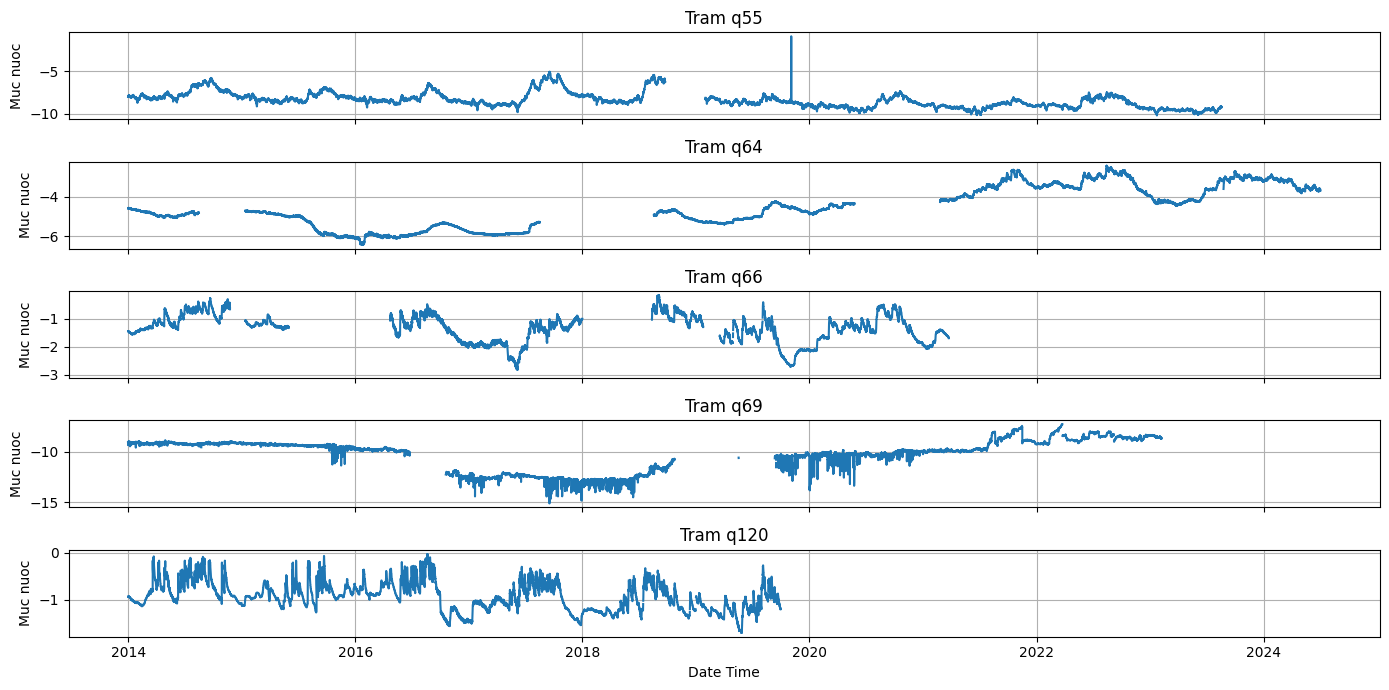

In [ ]:
# Define the energy sources of interest
waterlevel_sources = ['q55', 'q64', 'q66', 'q69', 'q120']

# Create subplots for the selected energy sources
fig, axes = plt.subplots(nrows=len(waterlevel_sources), ncols=1, figsize=(14, 7), sharex=True)

# Plot each energy source in its own subplot
for i, source in enumerate(waterlevel_sources):
    axes[i].plot(df.index, df[source], label=source)
    axes[i].set_ylabel('Muc nuoc')
    axes[i].set_title(f'Tram {source}')
    axes[i].grid(True)

# Set common x-axis label and adjust layout
plt.xlabel('Date Time')
plt.tight_layout()
plt.show()

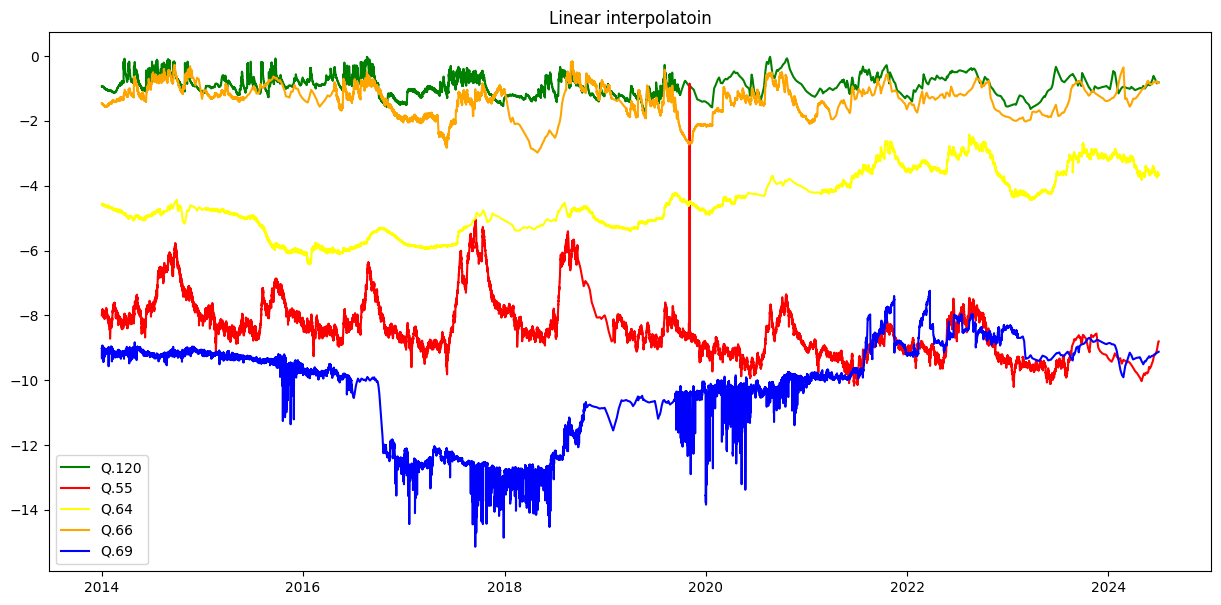

In [ ]:
#tien xu ly du lieu bang phuong phap Linear Interpolation
plt.rcParams['figure.figsize']=(15,7)

# on our data, impute the missing values using rolling window method
df['q64_l']= df['q64'].interpolate(method='linear')
df['q120_l']= df['q120'].interpolate(method='linear')
df['q55_l']= df['q55'].interpolate(method='linear')
df['q66_l']= df['q66'].interpolate(method='linear')
df['q69_l']= df['q69'].interpolate(method='linear')
# plot the complete dataset
plt.plot(df['q120_l'], color='green', label='Q.120')
plt.plot(df['q55_l'], color='red', label='Q.55')
plt.plot(df['q64_l'], color='yellow', label='Q.64')
plt.plot(df['q66_l'], color='orange', label='Q.66')
plt.plot(df['q69_l'], color='blue', label='Q.69')

plt.title('Linear interpolatoin')
plt.legend()
plt.show()

In [ ]:
print(df.head())

                      q55   q64   q66   q69  q120  q64_l  q120_l  q55_l  \
datetime                                                                  
2014-01-01 01:00:00 -8.00 -4.58 -1.45 -9.01 -0.94  -4.58   -0.94  -8.00   
2014-01-01 03:00:00 -7.98 -4.57 -1.45 -9.00 -0.94  -4.57   -0.94  -7.98   
2014-01-01 05:00:00 -7.95 -4.58 -1.45 -9.00 -0.94  -4.58   -0.94  -7.95   
2014-01-01 07:00:00 -7.92 -4.59 -1.45 -9.01 -0.94  -4.59   -0.94  -7.92   
2014-01-01 09:00:00 -7.98 -4.59 -1.46 -9.00 -0.94  -4.59   -0.94  -7.98   

                     q66_l  q69_l  
datetime                           
2014-01-01 01:00:00  -1.45  -9.01  
2014-01-01 03:00:00  -1.45  -9.00  
2014-01-01 05:00:00  -1.45  -9.00  
2014-01-01 07:00:00  -1.45  -9.01  
2014-01-01 09:00:00  -1.46  -9.00  


<Axes: ylabel='q120_l'>

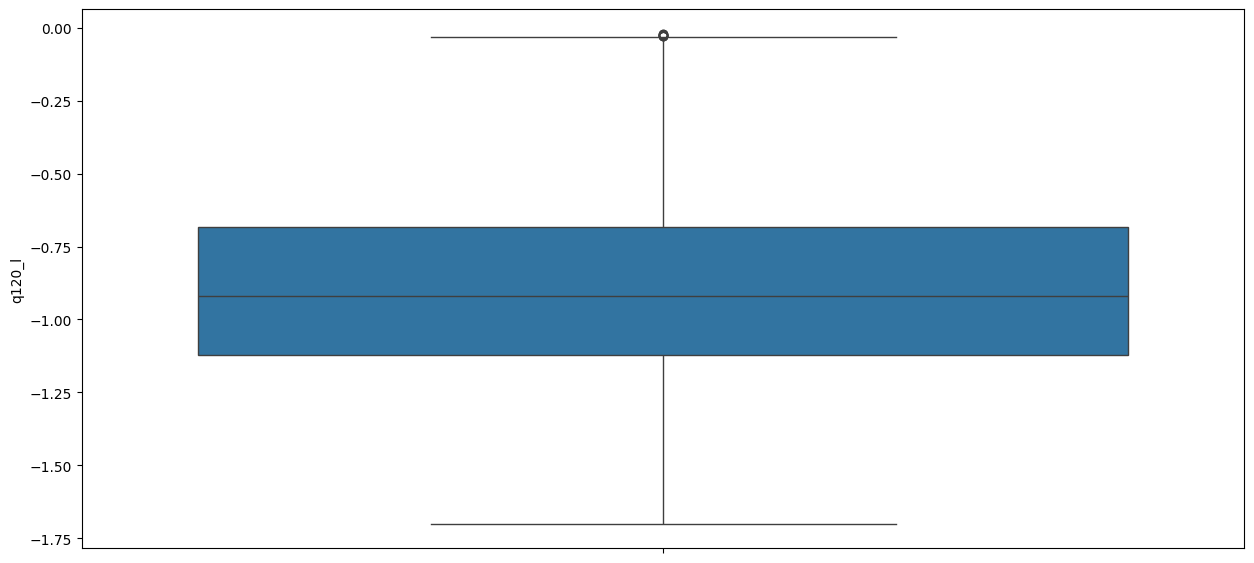

In [ ]:
#xem xét các giá trị outliers
sns.boxplot(df['q120_l'])

<Axes: ylabel='q55_l'>

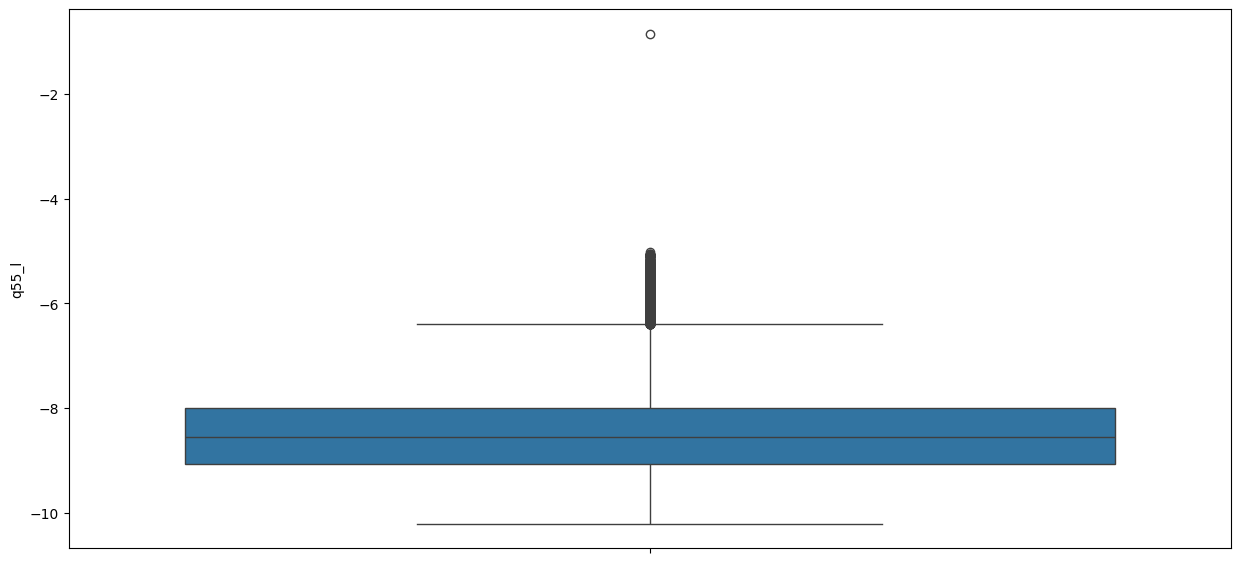

In [ ]:
sns.boxplot(df['q55_l'])

<Axes: ylabel='q64_l'>

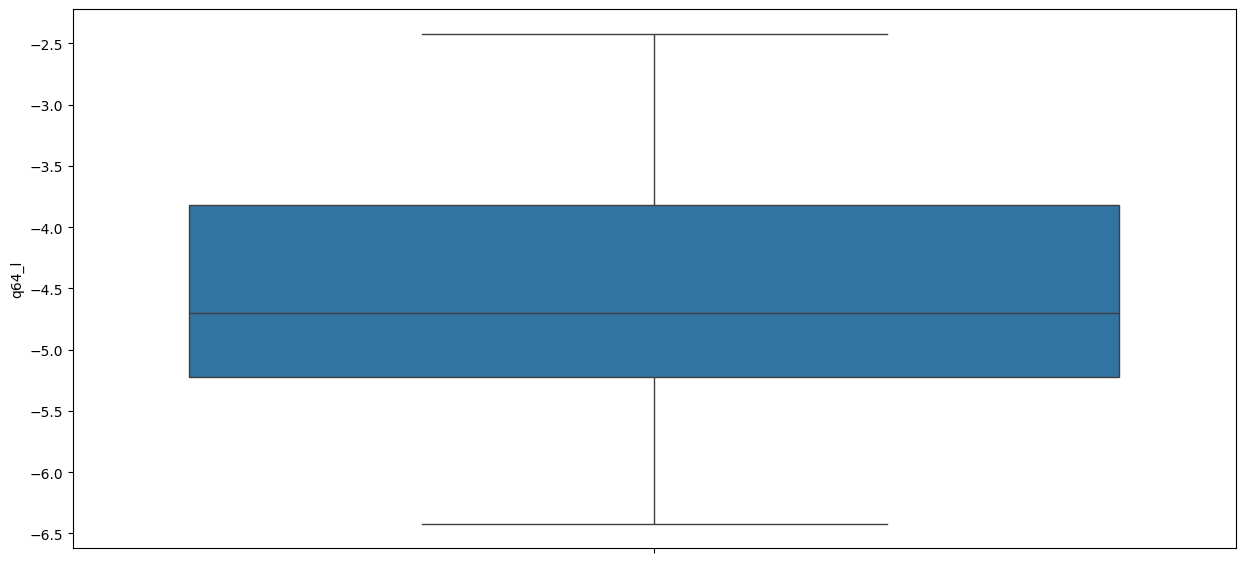

In [ ]:
sns.boxplot(df['q64_l'])

<Axes: ylabel='q66_l'>

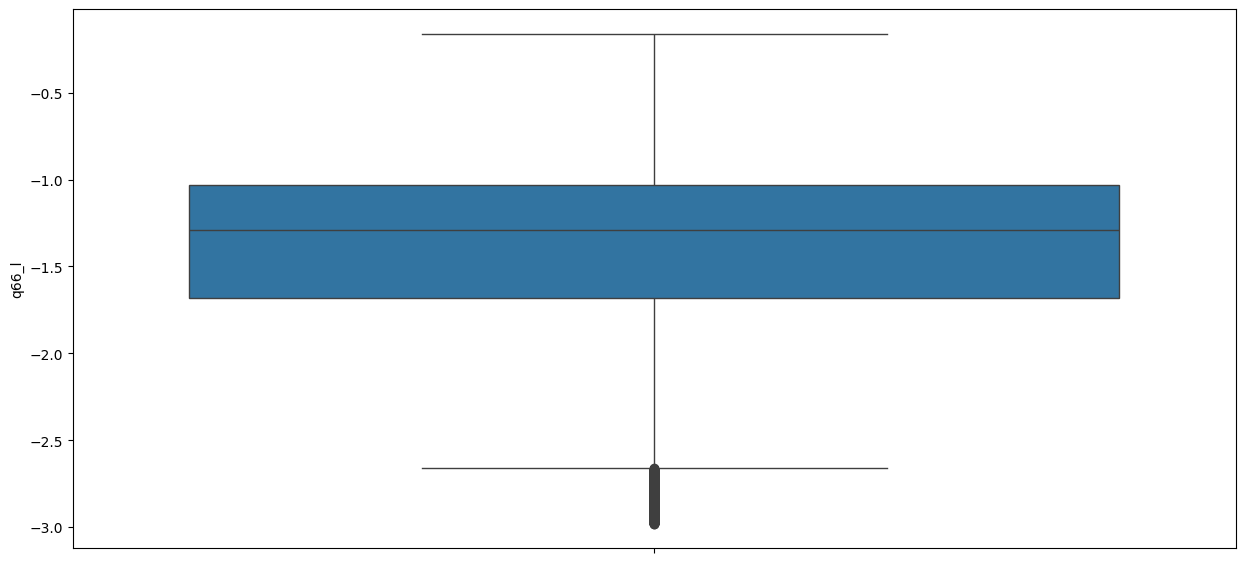

In [ ]:
sns.boxplot(df['q66_l'])

<Axes: ylabel='q69_l'>

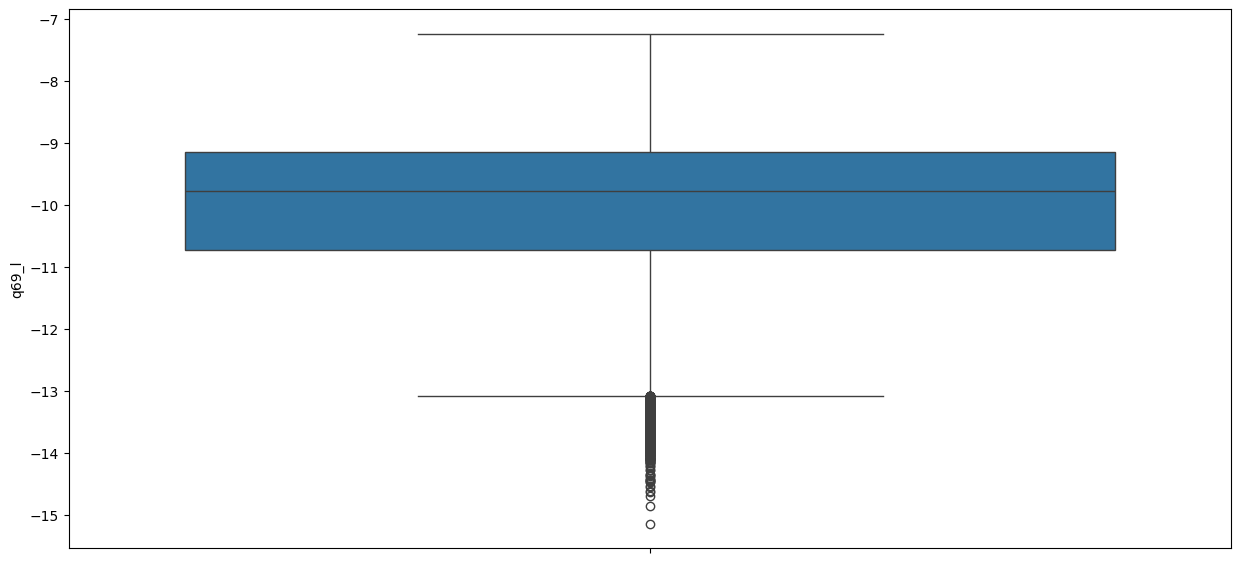

In [ ]:
sns.boxplot(df['q69_l'])

In [ ]:
df['q120_l'].describe()

,q120_l
count,47503.000000
mean,-0.904327
std,0.312556
min,-1.700000
25%,-1.120745
50%,-0.920000
75%,-0.684362
max,-0.020000


In [ ]:
df['q55_l'].describe()

,q55_l
count,47503.000000
mean,-8.429001
std,0.901949
min,-10.210000
25%,-9.070000
50%,-8.550000
75%,-8.000000
max,-0.850000


In [ ]:
df['q64_l'].describe()

,q64_l
count,47503.000000
mean,-4.541881
std,0.927338
min,-6.420000
25%,-5.226712
50%,-4.700000
75%,-3.820733
max,-2.420000


In [ ]:
df['q66_l'].describe()

,q66_l
count,47503.000000
mean,-1.364522
std,0.496438
min,-2.980000
25%,-1.683114
50%,-1.290000
75%,-1.031167
max,-0.160000


In [ ]:
df['q69_l'].describe()

,q69_l
count,47503.000000
mean,-10.109720
std,1.389154
min,-15.140000
25%,-10.724868
50%,-9.780000
75%,-9.152915
max,-7.240000


In [ ]:
#ham xu ly gia tri outliers
def zscore(s, window, thresh=4, return_all=False):
    roll = s.rolling(window=window, min_periods=1, center=True)
    avg = roll.mean()
    std = roll.std(ddof=0)
    z = s.sub(avg).div(std)
    m = z.between(-thresh, thresh)

    if return_all:
        return z, avg, std, m
    return s.where(m, avg)


df['q120lo'] = zscore(df['q120_l'], window=50)
df['q55lo'] = zscore(df['q55_l'], window=50)
df['q64lo'] = df['q64_l']
df['q66lo'] = zscore(df['q66_l'], window=50)
df['q69lo'] = zscore(df['q69_l'], window=50)
#df['date_measure'] = df['date_measure']


<Axes: ylabel='q69lo'>

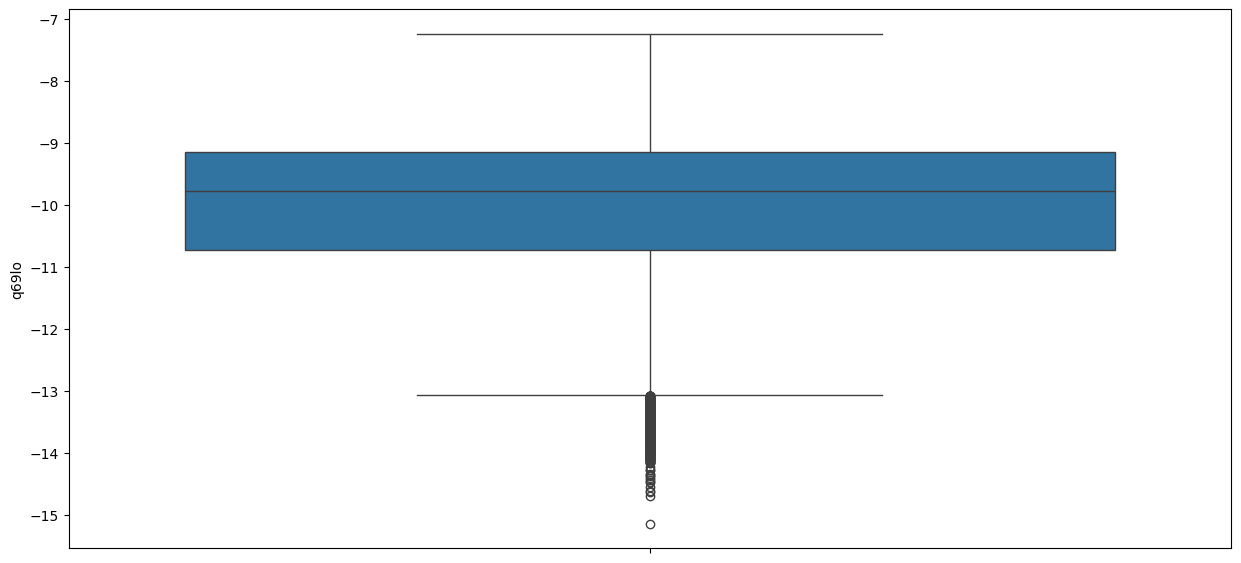

In [ ]:
sns.boxplot(df['q69lo'])

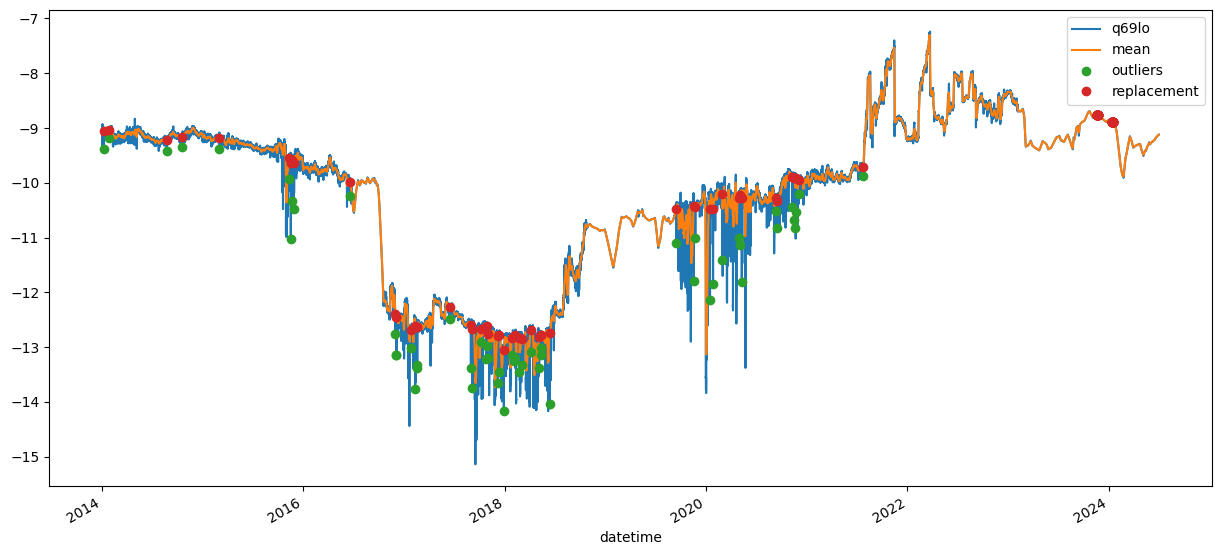

In [ ]:
z, avg, std, m = zscore(df['q69lo'], window=50, return_all=True)

ax = plt.subplot()

df['q69lo'].plot(label='q69lo')
avg.plot(label='mean')
df.loc[~m, 'q69lo'].plot(label='outliers', marker='o', ls='')
avg[~m].plot(label='replacement', marker='o', ls='')
plt.legend()

In [ ]:
print(df.head())

                      q55   q64   q66   q69  q120  q64_l  q120_l  q55_l  \
datetime                                                                  
2014-01-01 01:00:00 -8.00 -4.58 -1.45 -9.01 -0.94  -4.58   -0.94  -8.00   
2014-01-01 03:00:00 -7.98 -4.57 -1.45 -9.00 -0.94  -4.57   -0.94  -7.98   
2014-01-01 05:00:00 -7.95 -4.58 -1.45 -9.00 -0.94  -4.58   -0.94  -7.95   
2014-01-01 07:00:00 -7.92 -4.59 -1.45 -9.01 -0.94  -4.59   -0.94  -7.92   
2014-01-01 09:00:00 -7.98 -4.59 -1.46 -9.00 -0.94  -4.59   -0.94  -7.98   

                     q66_l  q69_l  q120lo  q55lo  q64lo  q66lo  q69lo  
datetime                                                               
2014-01-01 01:00:00  -1.45  -9.01   -0.94  -8.00  -4.58  -1.45  -9.01  
2014-01-01 03:00:00  -1.45  -9.00   -0.94  -7.98  -4.57  -1.45  -9.00  
2014-01-01 05:00:00  -1.45  -9.00   -0.94  -7.95  -4.58  -1.45  -9.00  
2014-01-01 07:00:00  -1.45  -9.01   -0.94  -7.92  -4.59  -1.45  -9.01  
2014-01-01 09:00:00  -1.46  -9.00   -0.94 

In [ ]:
df.to_csv('filename.csv', index=True)

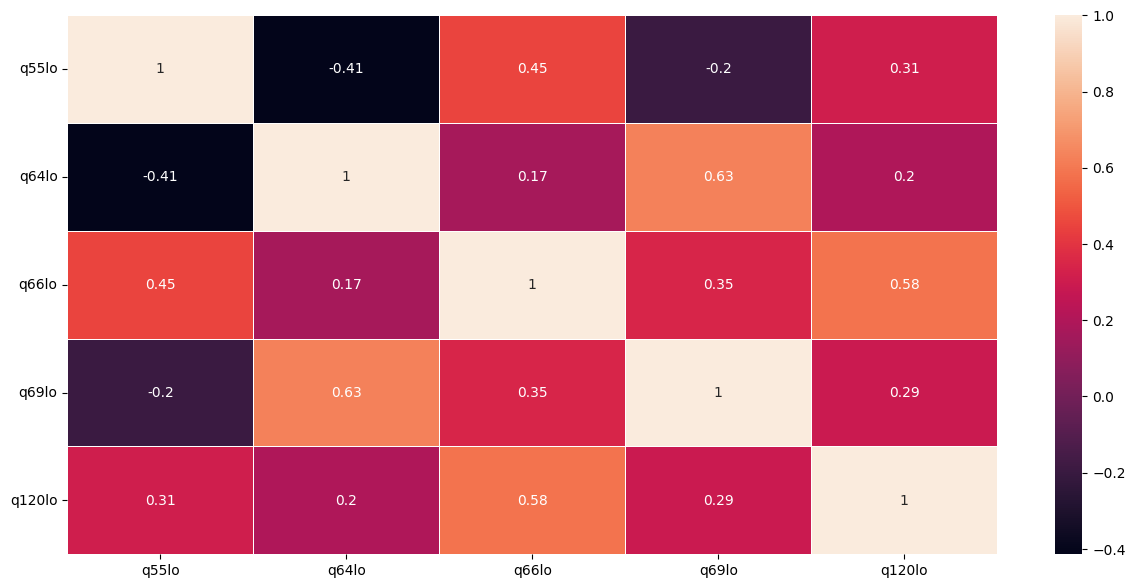

In [ ]:
corr_df = df[['q55lo', 'q64lo', 'q66lo','q69lo','q120lo']].corr(method='spearman')

# Customize the heatmap of the corr_meat correlation matrix
sns.heatmap(corr_df,
           annot=True,
           linewidths=0.4,
           annot_kws={'size': 10});

plt.xticks(rotation=0);
plt.yticks(rotation=0);

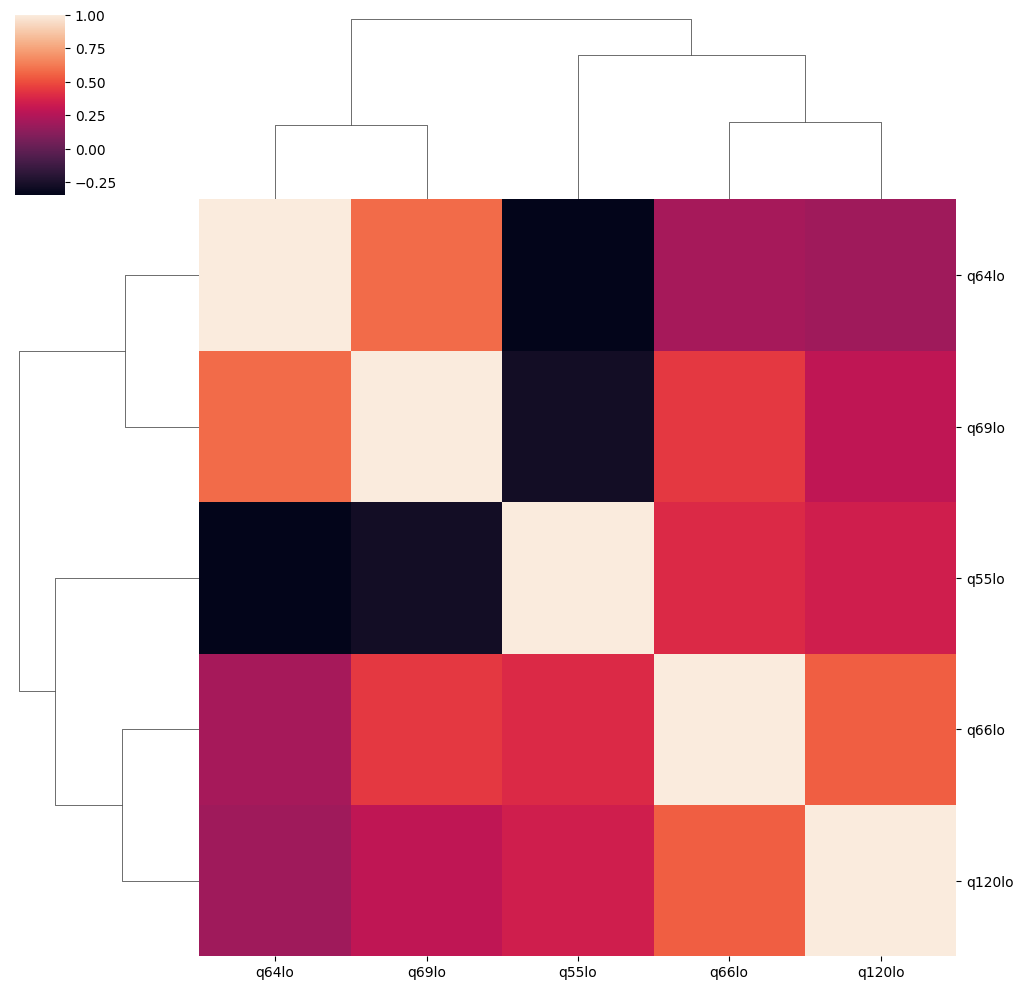

In [ ]:
corr_df = df[['q55lo', 'q64lo', 'q66lo','q69lo','q120lo']].corr(method='pearson')

# Customize the heatmap of the corr_meat correlation matrix
fig = sns.clustermap(corr_df,
               row_cluster=True,
               col_cluster=True,
               figsize=(10, 10));

plt.setp(fig.ax_heatmap.xaxis.get_majorticklabels(), rotation=0);
plt.setp(fig.ax_heatmap.yaxis.get_majorticklabels(), rotation=0);